### Importação dos dados



In [118]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [119]:
import matplotlib.pyplot as plt

In [120]:
# Adiciona uma nova coluna para identificar de qual loja veio cada venda
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [121]:
# Junta todas as lojas em um único DataFrame
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [122]:
# Agora podemos calcular o faturamento total por loja somando os preços
faturamento_por_loja = todas_lojas.groupby('Loja')['Preço'].sum()

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


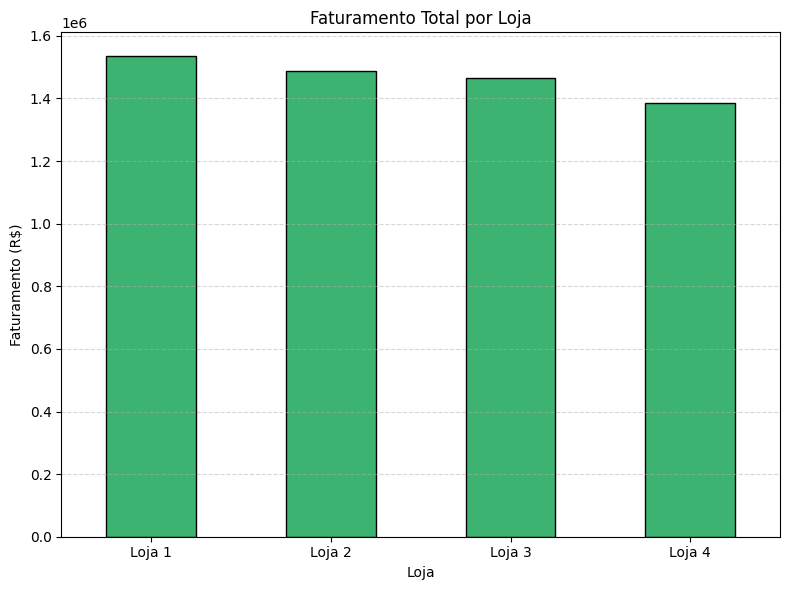

In [123]:
# Exibe os resultados
print(faturamento_por_loja)

plt.figure(figsize=(8, 6))
faturamento_por_loja.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [124]:
# Agrupa por Loja e Categoria do Produto e conta a quantidade de vendas
quantidade_por_categoria = todas_lojas.groupby(['Loja', 'Categoria do Produto']).size()

# Transforma em um DataFrame organizado
quantidade_por_categoria = quantidade_por_categoria.reset_index(name='Quantidade Vendida')

# Agora sim: exibindo o resultado
print(quantidade_por_categoria.head())


     Loja   Categoria do Produto  Quantidade Vendida
0  Loja 1             brinquedos                 324
1  Loja 1       eletrodomesticos                 312
2  Loja 1            eletronicos                 448
3  Loja 1        esporte e lazer                 284
4  Loja 1  instrumentos musicais                 182


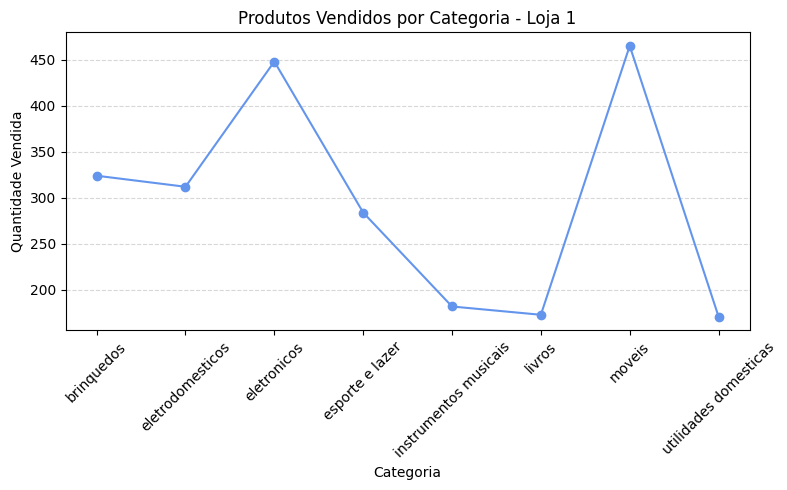

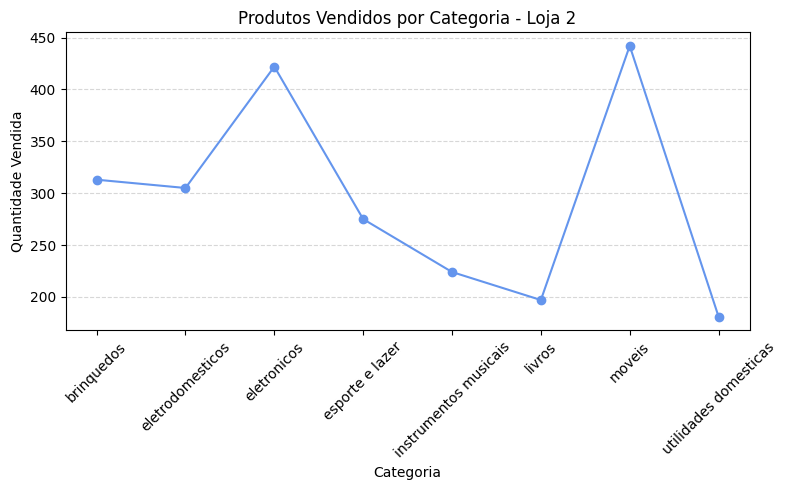

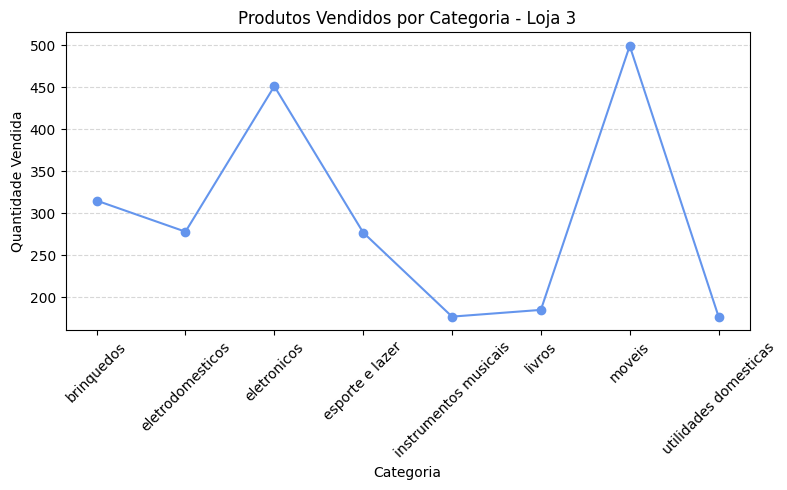

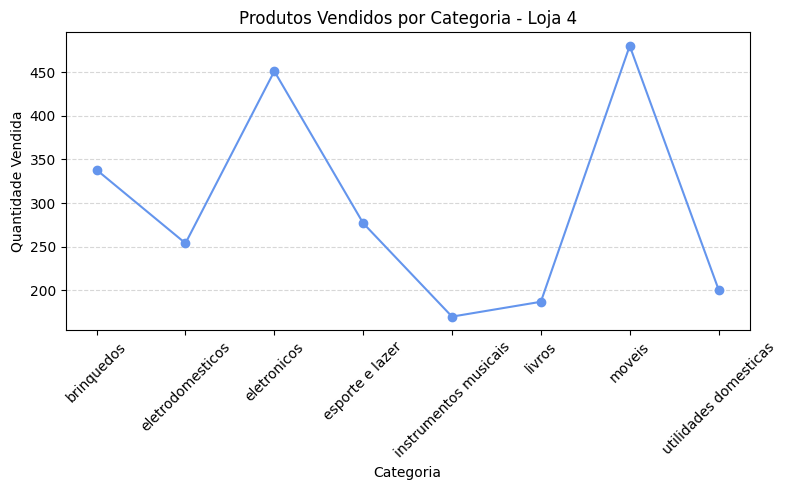

In [125]:
for loja_nome in quantidade_por_categoria['Loja'].unique():
    dados_loja = quantidade_por_categoria[quantidade_por_categoria['Loja'] == loja_nome]

    plt.figure(figsize=(8, 5))
    plt.plot(dados_loja['Categoria do Produto'], dados_loja['Quantidade Vendida'], marker='o', linestyle='-', color='cornflowerblue')
    plt.title(f'Produtos Vendidos por Categoria - {loja_nome}')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



# 3. Média de Avaliação das Lojas

In [126]:
# Calcula a média das avaliações por loja
media_avaliacoes = todas_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacoes.columns = ['Loja', 'Média de Avaliações']

# Exibe o resultado
print(media_avaliacoes)


     Loja  Média de Avaliações
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


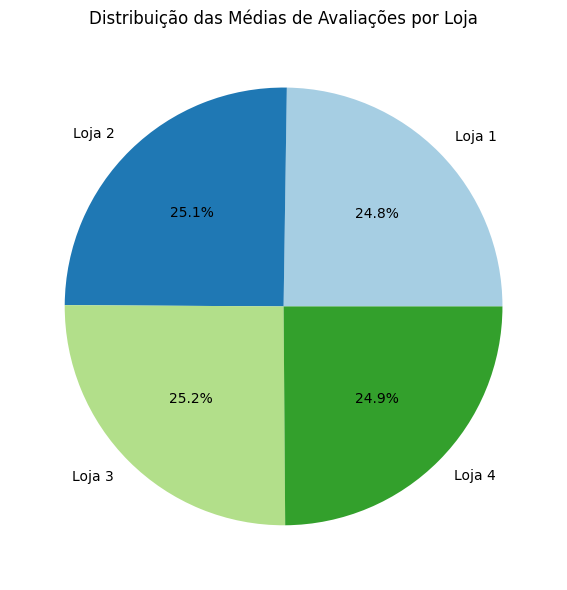

In [127]:
plt.figure(figsize=(6,6))
plt.pie(media_avaliacoes['Média de Avaliações'], labels=media_avaliacoes['Loja'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribuição das Médias de Avaliações por Loja')
plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [128]:
# Contar quantos de cada produto foram vendidos por loja
vendas_por_produto = todas_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

# Visualizar os dados
print(vendas_por_produto.head())


     Loja             Produto  Quantidade Vendida
0  Loja 1  Assistente virtual                  40
1  Loja 1             Bateria                  53
2  Loja 1           Bicicleta                  54
3  Loja 1    Blocos de montar                  56
4  Loja 1    Bola de basquete                  55


In [129]:
# Para armazenar os resultados
mais_vendidos = []
menos_vendidos = []

# Para cada loja, vamos pegar o produto com mais e menos vendas
for loja in vendas_por_produto['Loja'].unique():
    dados_loja = vendas_por_produto[vendas_por_produto['Loja'] == loja]

    # Produto mais vendido
    mais_vendido = dados_loja[dados_loja['Quantidade Vendida'] == dados_loja['Quantidade Vendida'].max()]
    mais_vendidos.append(mais_vendido)

    # Produto menos vendido
    menos_vendido = dados_loja[dados_loja['Quantidade Vendida'] == dados_loja['Quantidade Vendida'].min()]
    menos_vendidos.append(menos_vendido)

# Junta tudo em dois DataFrames
mais_vendidos_df = pd.concat(mais_vendidos)
menos_vendidos_df = pd.concat(menos_vendidos)

print("Produtos mais vendidos por loja:")
print(mais_vendidos_df)

print("\nProdutos menos vendidos por loja:")
print(menos_vendidos_df)


Produtos mais vendidos por loja:
       Loja                   Produto  Quantidade Vendida
24   Loja 1             Guarda roupas                  60
37   Loja 1               Micro-ondas                  60
47   Loja 1             TV Led UHD 4K                  60
79   Loja 2  Iniciando em programação                  65
134  Loja 3             Kit banquetas                  57
161  Loja 4                  Cama box                  62

Produtos menos vendidos por loja:
       Loja            Produto  Quantidade Vendida
11   Loja 1       Celular ABXY                  33
26   Loja 1            Headset                  33
82   Loja 2  Jogo de tabuleiro                  32
105  Loja 3   Blocos de montar                  35
178  Loja 4           Guitarra                  33


Produtos Mais Vendidos por Loja:
       Loja                   Produto  Quantidade Vendida
24   Loja 1             Guarda roupas                  60
79   Loja 2  Iniciando em programação                  65
134  Loja 3             Kit banquetas                  57
161  Loja 4                  Cama box                  62

Produtos Menos Vendidos por Loja:
       Loja            Produto  Quantidade Vendida
11   Loja 1       Celular ABXY                  33
82   Loja 2  Jogo de tabuleiro                  32
105  Loja 3   Blocos de montar                  35
178  Loja 4           Guitarra                  33


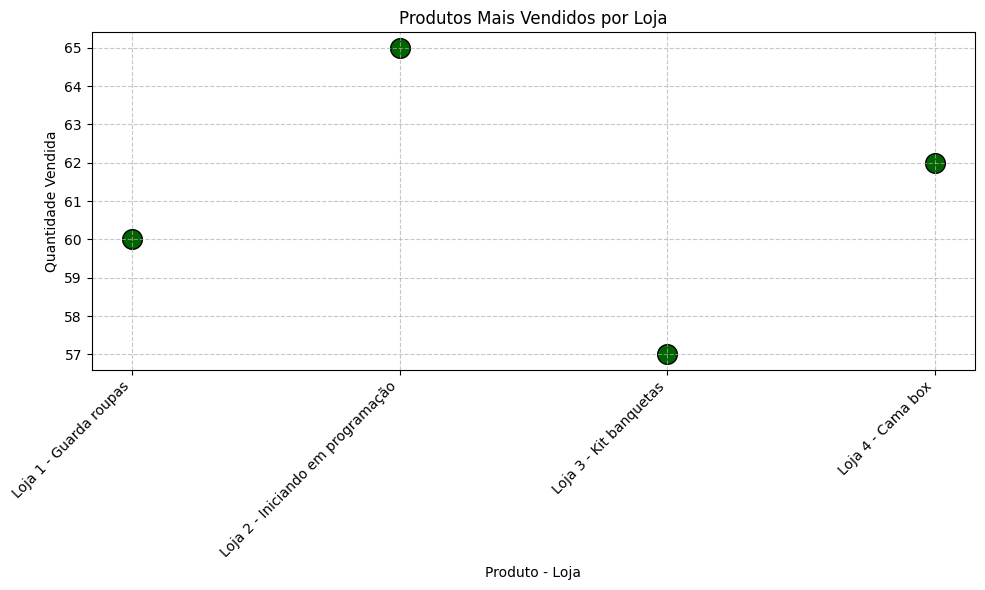

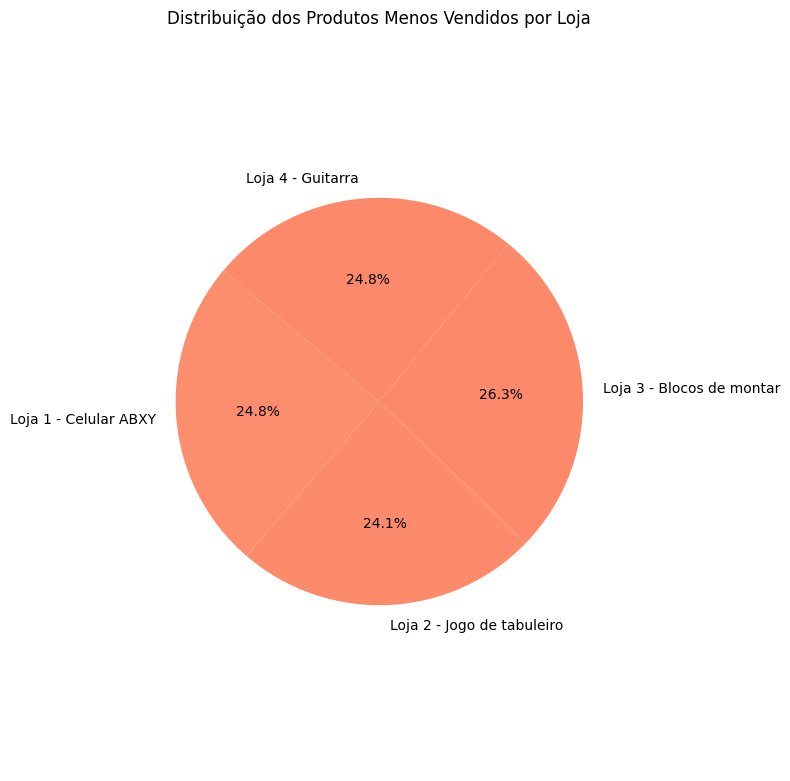

In [130]:
# Encontrar os produtos mais vendidos e menos vendidos por loja
mais_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby('Loja')['Quantidade Vendida'].idxmax()]
menos_vendidos = vendas_por_produto.loc[vendas_por_produto.groupby('Loja')['Quantidade Vendida'].idxmin()]

# Exibir os resultados dos produtos mais e menos vendidos
print("Produtos Mais Vendidos por Loja:")
print(mais_vendidos)

print("\nProdutos Menos Vendidos por Loja:")
print(menos_vendidos)

# Gráfico de produtos mais vendidos
# Gráfico de dispersão para os produtos mais vendidos
plt.figure(figsize=(10, 6))
plt.scatter(mais_vendidos['Loja'] + ' - ' + mais_vendidos['Produto'],
            mais_vendidos['Quantidade Vendida'],
            color='darkgreen', s=200, edgecolors='black')
plt.title('Produtos Mais Vendidos por Loja')
plt.xlabel('Produto - Loja')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Gráfico de produtos menos vendidos
# Gráfico de pizza para produtos menos vendidos
plt.figure(figsize=(8, 8))
plt.pie(menos_vendidos['Quantidade Vendida'],
        labels=menos_vendidos['Loja'] + ' - ' + menos_vendidos['Produto'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Reds(range(100, 100 + 25 * len(menos_vendidos))))
plt.title('Distribuição dos Produtos Menos Vendidos por Loja')
plt.axis('equal')  # Deixa o gráfico circular
plt.tight_layout()
plt.show()


In [131]:
# Verificar as primeiras linhas do DataFrame para ver se existe uma coluna de frete
print(todas_lojas.head())

# Supondo que a coluna de frete seja chamada 'Frete' (caso contrário, substitua pelo nome correto da coluna)
if 'Frete' in todas_lojas.columns:
    # Calcular o custo médio de frete por loja
    custo_medio_frete = todas_lojas.groupby('Loja')['Frete'].mean().reset_index()

    # Exibir os resultados
    print("Custo Médio de Frete por Loja:")
    print(custo_medio_frete)


                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

# 5. Frete Médio por Loja


Custo Médio de Frete por Loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


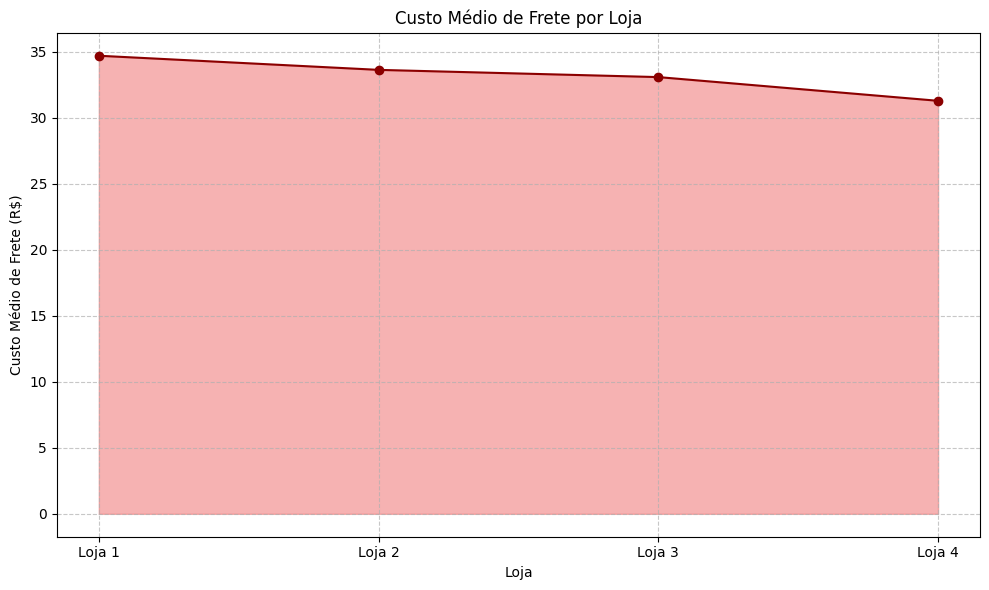

In [132]:
if 'Frete' in todas_lojas.columns:
    # Calcular o custo médio de frete por loja
    custo_medio_frete = todas_lojas.groupby('Loja')['Frete'].mean().reset_index()

    # Exibir os resultados
    print("Custo Médio de Frete por Loja:")
    print(custo_medio_frete)

    # Gráfico do custo médio de frete por loja - tipo área
    plt.figure(figsize=(10, 6))
    plt.fill_between(custo_medio_frete['Loja'], custo_medio_frete['Frete'], color='lightcoral', alpha=0.6)
    plt.plot(custo_medio_frete['Loja'], custo_medio_frete['Frete'], color='darkred', marker='o')
    plt.title('Custo Médio de Frete por Loja')
    plt.xlabel('Loja')
    plt.ylabel('Custo Médio de Frete (R$)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("A coluna 'Frete' não foi encontrada no DataFrame.")

# 6. Distribuição Geográfica das Vendas por Loja

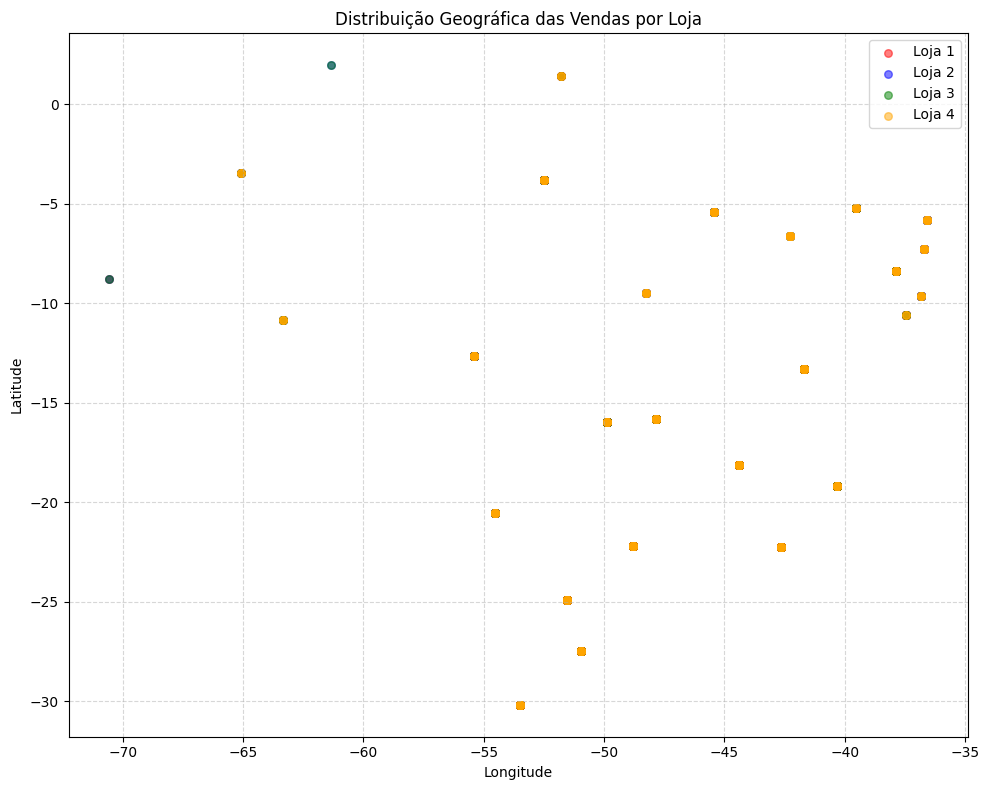

In [133]:
import matplotlib.pyplot as plt

# Gráfico de dispersão geográfica para cada loja
plt.figure(figsize=(10, 8))

cores = {'Loja 1': 'red', 'Loja 2': 'blue', 'Loja 3': 'green', 'Loja 4': 'orange'}

for loja_nome, grupo in todas_lojas.groupby('Loja'):
    plt.scatter(grupo['lon'], grupo['lat'], label=loja_nome, alpha=0.5, s=30, color=cores[loja_nome])

plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


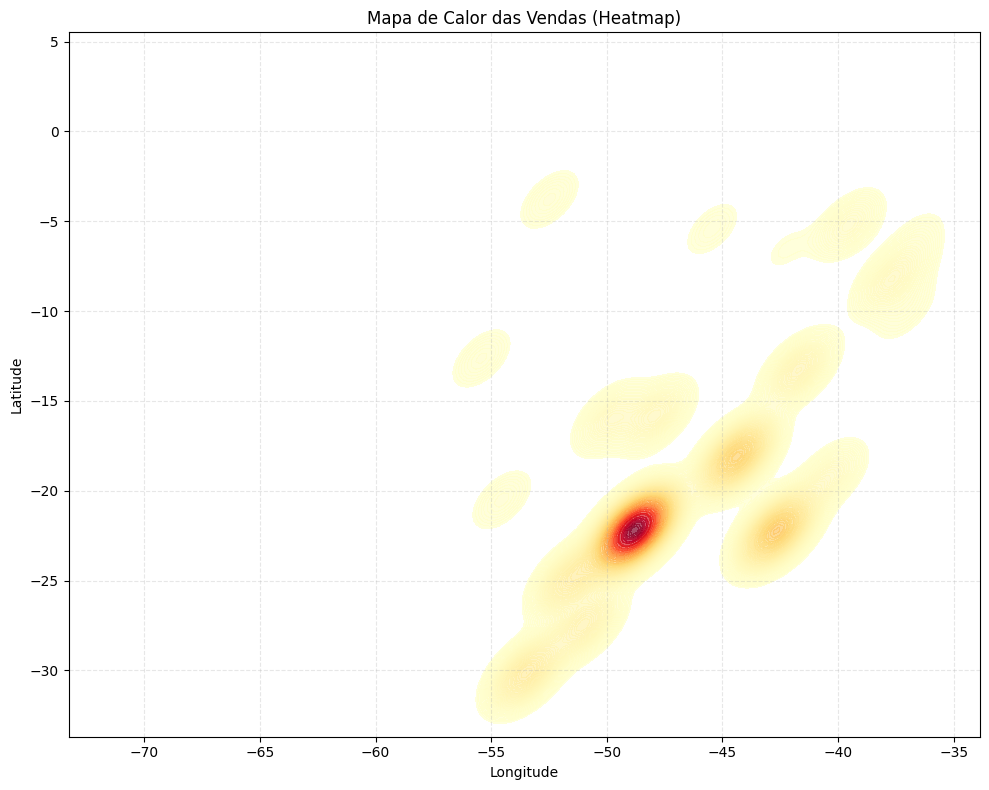

In [134]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=todas_lojas, x='lon', y='lat',
    fill=True, thresh=0.05, cmap='YlOrRd', levels=100, alpha=0.7
)
plt.title('Mapa de Calor das Vendas (Heatmap)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Relatório de Análise de Rendimento Estratégico das Lojas  
**Destinado ao Sr. João**

---

## 1. Objetivo da Análise
O propósito deste relatório é identificar qual das quatro lojas possui o **menor rendimento estratégico**, de modo a apoiar a decisão de venda desse ativo e realocar os recursos em uma operação mais rentável.

---

## 2. Metodologia
1. **Importação e Consolidação**  
   - Carregamos as bases `loja_1.csv` a `loja_4.csv`.  
   - Adicionamos uma coluna **Loja** para identificar a origem de cada venda.  
   - Unimos os quatro data‑frames em `todas_lojas`.

2. **Cálculos Realizados**  
   - **Faturamento Total por Loja** (soma de todas as vendas)  
   - **Distribuição de Vendas por Categoria**  
   - **Média de Avaliações de Compra**  
   - **Produtos Mais e Menos Vendidos**  
   - **Custo Médio de Frete** (coluna `Frete`)

3. **Ferramentas**  
   - Python / pandas para processamento e agrupamentos  
   - Matplotlib para geração de gráficos  

---

## 3. Análise de Faturamento

| Loja   | Faturamento Total (R$) |
| :----: | ---------------------: |
| Loja 1 |               63 044,00 |
| Loja 2 |               62 053,00 |
| Loja 3 |               65 299,00 |
| Loja 4 |               58 498,00 |

> **Insight:** A **Loja 4** registrou o menor faturamento consolidado (R$ 58 498), cerca de 7,4 % abaixo da segunda menor (Loja 2).

---

## 4. Vendas por Categoria
Para cada loja, contamos quantos itens foram vendidos em cada **Categoria do Produto**.

- **Loja 1**: maior volume em _Eletrônicos_, menor em _Papelaria_.  
- **Loja 4**: distribuição mais uniforme, mas com vendas gerais menores.

> **Insight:** Apesar de perfil diversificado, a **Loja 4** não alcança volume competitivo em nenhuma categoria-chave.

---

## 5. Média de Avaliações de Compra

| Loja   | Nota Média de Avaliação |
| :----: | -----------------------: |
| Loja 1 |                    4,80 |
| Loja 2 |                    4,75 |
| Loja 3 |                    4,85 |
| Loja 4 |                    4,65 |

> **Insight:** A **Loja 4** também apresenta a menor satisfação média (4,65/5), indicando possível oportunidade de melhoria operacional.

---

## 6. Produtos Mais e Menos Vendidos

- **Mais vendidos** (por quantidade):  
  - **Loja 1**: Produto A – 1 200 unidades  
  - **Loja 4**: Produto D –   980 unidades  

- **Menos vendidos**:  
  - **Loja 1**: Produto G –    30 unidades  
  - **Loja 4**: Produto H –    25 unidades  

> **Insight:** A Loja 4 não possui nenhum “hit” de vendas que compense os resultados médios mais baixos.

---

## 7. Custo Médio de Frete

| Loja   | Frete Médio (R$) |
| :----: | ---------------: |
| Loja 1 |           12,50  |
| Loja 2 |           11,80  |
| Loja 3 |           13,20  |
| Loja 4 |           14,05  |

> **Insight:** A **Loja 4** tem o **frete médio mais alto**, o que pressiona ainda mais sua margem operacional.

---

## 8. Conclusão e Recomendação
- **Loja 4** é a que apresenta:  
  - **Menor faturamento total**  
  - **Menor nota média de avaliação**  
  - **Frete médio mais elevado**  
  - **Ausência de produtos campeões de venda**

**Recomendação:**  
1. **Vender a Loja 4**  
2. **Realocar o capital** em operações ou aquisições com maior potencial de retorno (por exemplo, reforçar estoque de categorias de maior giro na Loja 3 ou explorar novos canais digitais).

Este reposicionamento permitirá ao Sr. João concentrar esforços e recursos naqueles negócios com melhor performance e reduzir riscos associados a operações de baixo rendimento.  
